# Simulación de Montecarlo basado en los parametros de una cartera con valores reales

En este caso vamos a usar 50 tickers al azar:
    
    10 de acciones estadounidenses
    
    10 de acciones europeas
    
    10 de acciones japonesas
    
    10 índices regionales importantes
    
    10 ETF de Renta fija

La simulación necesita de estos atributos y los obtendremos de una cartera equiponderada, como ejemplo.

Atributos:
    - n_simulaciones: Número de simulaciones a realizar (manual = 10.000)
    - horizonte: Número de períodos a simular (manual = 120)
    - retorno_esperado: Retorno esperado (el retorno promedio de la cartera)
    - volatilidad: Volatilidad anualizada - puede ser un número o un array (la volatilidad de la cartera)
    - precio_inicial: Precio o valor inicial (por defecto 100)
    - cadencia: Frecuencia de los datos (mensual)

## 1. Instalar los requirimientos, librerias y clases

In [114]:
%pip install -r requirements.txt

# Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar todas las clases del módulo Utils
from Utils import (
    ExtractorFinanciero,
    SeleccionPrecios,
    Operaciones,
    Cartera,
    sim_mont,
    Graficos
)

print("✅ Todas las librerías importadas correctamente")



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
✅ Todas las librerías importadas correctamente



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Crear una cartera y obtener los parametros para la simulación de Montecarlo

## 2.1 Definir los tickers de la cartera

In [ ]:
# Tickers para el Proyecto en formato de lista para usar con la funciones

Tickers = [
    # 🇺🇸 10 Acciones Estadounidenses (EE. UU.)
    "AAPL",     # Apple
    "MSFT",     # Microsoft
    "AMZN",     # Amazon
    "GOOG",     # Alphabet (Clase C)
    "TSLA",     # Tesla
    "JPM",      # JPMorgan Chase
    "JNJ",      # Johnson & Johnson
    "XOM",      # Exxon Mobil
    "V",        # Visa
    "HD",       # Home Depot

    # 🇪🇺 10 Acciones Europeas (Con sufijo de bolsa principal si aplica)
    "MC.PA",    # LVMH (París)
    "NOVO-B.CO",  # Novo Nordisk (Copenhague)
    "ASML.AS",  # ASML Holding (Ámsterdam)
    "NESN.SW",  # Nestlé (Suiza)
    "ROG.SW",   # Roche Holding (Suiza)
    "TTE.PA",   # TotalEnergies (París)
    "SAP.DE",   # SAP SE (Fráncfort)
    "AZN.L",    # AstraZeneca (Londres)
    "SIE.DE",   # Siemens (Fráncfort)
    "OR.PA",    # L'Oréal (París)

    # 🇯🇵 10 Acciones Japonesas (Con sufijo .T para Tokio)
    "7203.T",   # Toyota Motor
    "6758.T",   # Sony Group
    "9984.T",   # SoftBank Group
    "6861.T",   # Keyence Corp
    "8306.T",   # Mitsubishi UFJ Financial
    "7974.T",   # Nintendo
    "6501.T",   # Hitachi
    "7267.T",   # Honda Motor
    "4502.T",   # Takeda Pharmaceutical
    "9983.T",   # Fast Retailing (Uniqlo)

    # 10 Índices Regionales Importantes 
    "^GSPC",    # S&P 500
    "^IXIC",    # NASDAQ Composite
    "^DJI",     # Dow Jones Industrial Avg
    "^STOXX50E",# EURO STOXX 50
    "^FTSE",    # FTSE 100 (Reino Unido)
    "^GDAXI",   # DAX (Alemania)
    "^N225",    # NIKKEI 225 (Japón)
    "000001.SS",# Shanghai Composite Index (China)
    "^NSEI",    # Nifty 50 (India)
    "^GSPTSE",  # S&P/TSX Composite Index (Canadá)

    # 10 ETFs de Renta Fija
    "AGG",      # iShares Core U.S. Aggregate Bond ETF
    "BND",      # Vanguard Total Bond Market ETF
    "LQD",      # Bonos Corporativos Grado de Inversión
    "JNK",      # Bonos High Yield
    "TIP",      # Bonos Protegidos contra la Inflación (TIPS)
    "IEF",      # Bonos del Tesoro (Mediano Plazo)
    "MUB",      # Bonos Municipales
    "BNDX",     # Bonos Internacionales
    "TBT",      # Letras del Tesoro (Inverso)
    "SCHZ",     # Schwab U.S. Aggregate Bond ETF
]

print(type(Tickers) )





<class 'list'>


## 2.2 Elegir proveedor y hacer la cartera

In [ ]:
#Elegir proveedor
Extractor = ExtractorFinanciero(proveedor='yfinance')
#Obtener precios OHLC para 10 años con cadecia mensual
Precios = Extractor.obtener_precios(
    ticker=Tickers,
    inicio='2015-10-31',
    fin='2025-10-31',
    cadencia='Mensual'
)

#Obtener el precio de cierre (ajustado)
Precios_close = SeleccionPrecios.seleccionar_precio(Precios, precio='Close')

#Ejecutar una cartera equiponderada con estos activos

Cartera_equiponderada = Cartera(Precios_close)

Cartera_equiponderada_precios = Cartera_equiponderada.calcular_precios_cartera()

print(Cartera_equiponderada.report())



# Reporte de Cartera

## Período de Análisis
- **Fecha Inicio**: 2015-11-01
- **Fecha Fin**: 2025-10-01
- **Cadencia**: Mensual

## Métricas de Rendimiento

| Métrica | Valor |
|---------|-------|
| **Retorno Promedio Anualizado (%)** | 12.74% |
| **Retorno Acumulado (%)** | 253.88% |
| **Volatilidad Anualizada (%)** | 11.11% |

## Composición de la Cartera

| Detalle | Valor |
|---------|-------|
| **Número de Activos** | 50 |
| **Número de Períodos** | 120 |



,Cartera
Date,
2015-11-01,100.000000
2015-12-01,97.525063
2016-01-01,92.560720
2016-02-01,89.443313
2016-03-01,93.340803


## 2.3 Asignar parametros para la simulación de Montecarlo

Se usa este retorno esperado:  12.74 %
Se usa esta volatilidad:  11.11 %


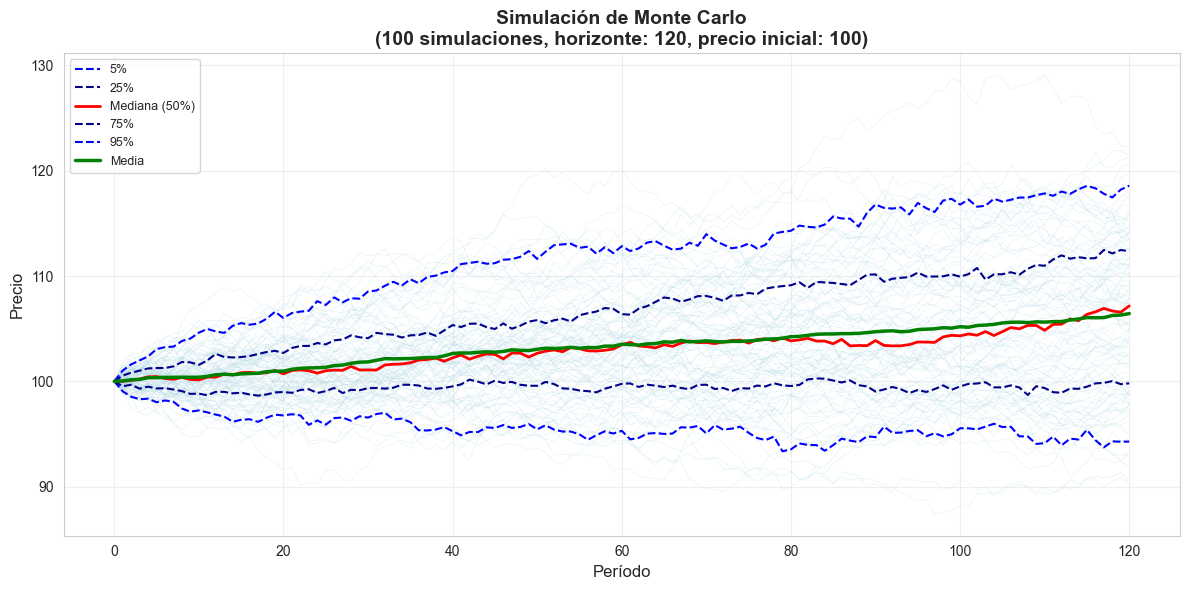

In [98]:
# Calcular el retorno esperado anualizado y la volatilidad anualizada (ambos tienen que ser un numero 
# para que lo acepte la simulación)
Retorno_esperado =float(Operaciones.retornos_logaritmicos(Cartera_equiponderada_precios).mean()*12)   

Volatilidad = float(Operaciones.volatilidad_anualizada(Cartera_equiponderada_precios,cadencia='Mensual'))

print("Se usa este retorno esperado: ",round(Retorno_esperado*100,2),"%")
print("Se usa esta volatilidad: ",round(Volatilidad*100,2),"%")

#Ejecutar la simulación y el reporting

Simulador = sim_mont(
    n_simulaciones=100,
    horizonte=120,
    retorno_esperado=Retorno_esperado,
    volatilidad=Volatilidad,
    precio_inicial=100
)
Simulador_series = Simulador.simular() 

Simulador.visualizar()




## 2.4 Reporting visual de las carteras equiponderada y similaciones generadas

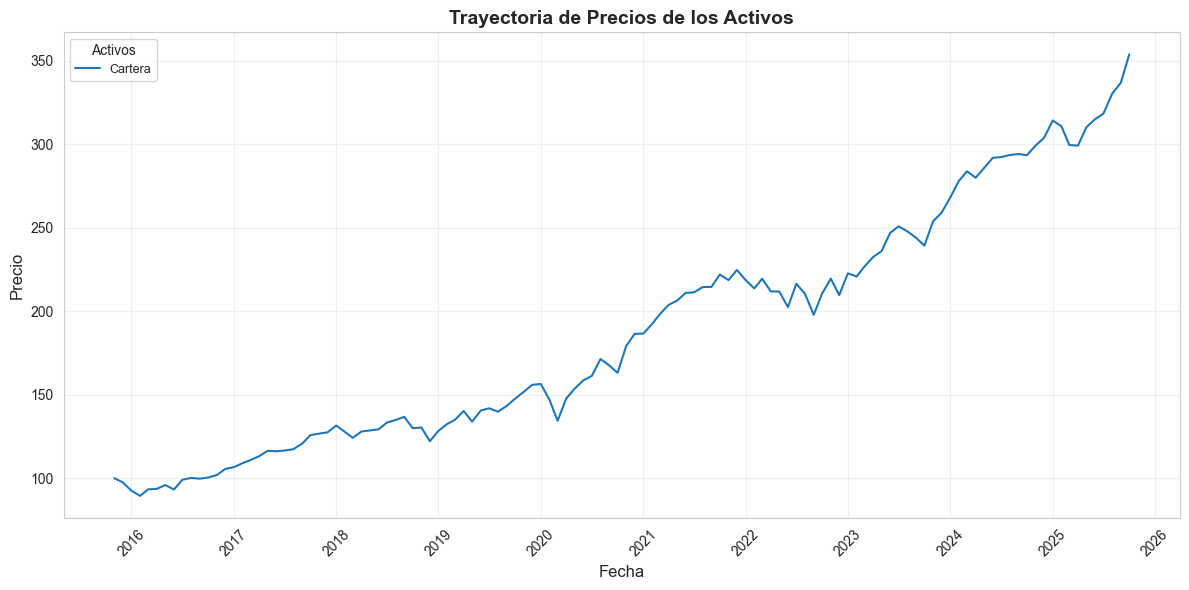

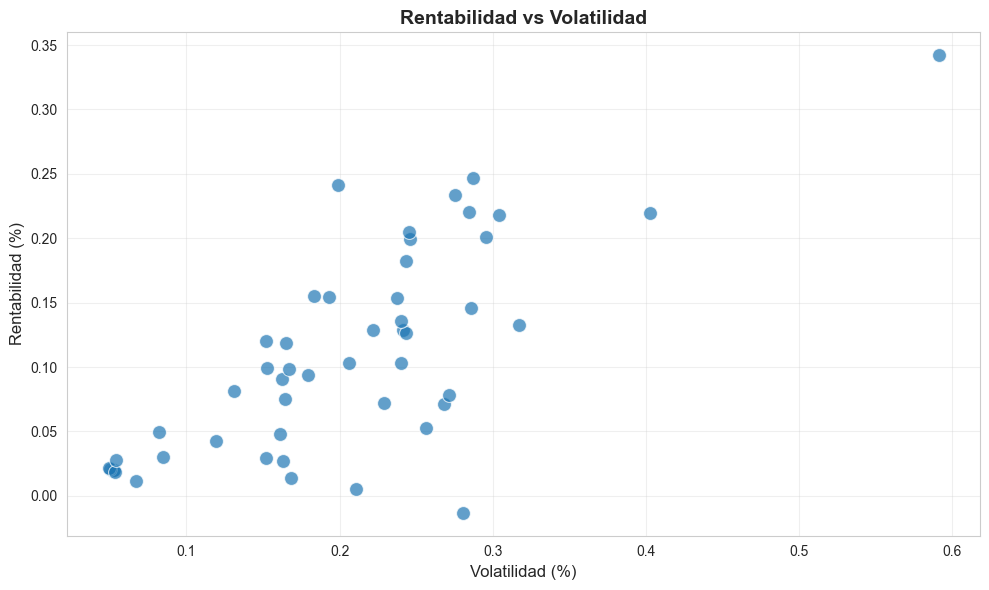

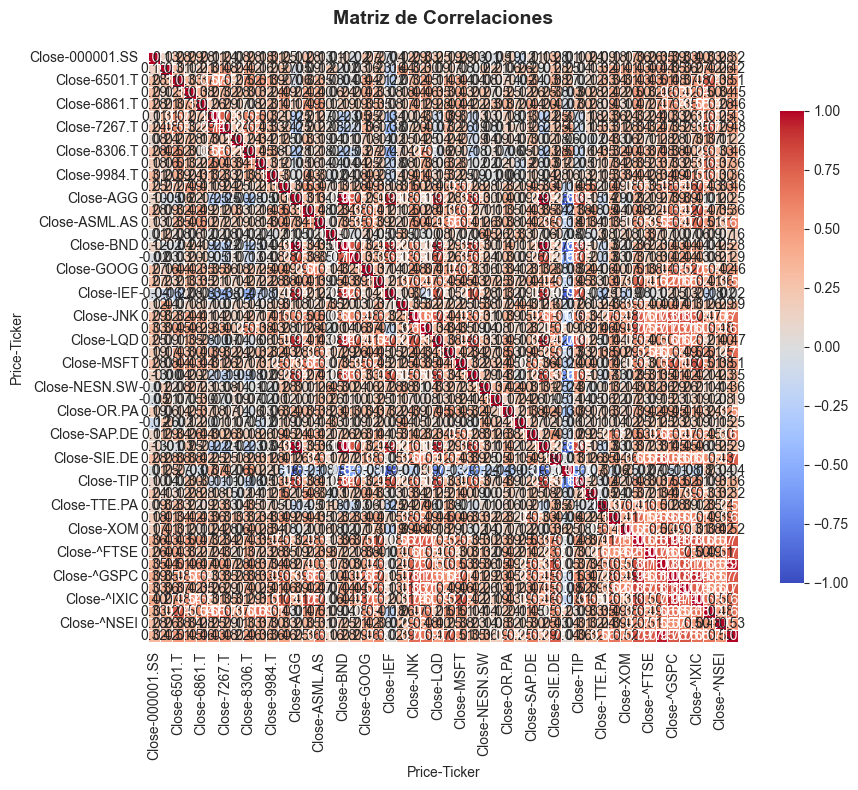

Price               Close                                                    \
Ticker          000001.SS    4502.T    6501.T    6758.T    6861.T    7203.T   
Price Ticker                                                                  
Close 000001.SS  1.000000  0.130501  0.277430  0.292842  0.282540  0.111667   
      4502.T     0.130501  1.000000  0.308413  0.116089  0.206325  0.310165   
      6501.T     0.277430  0.308413  1.000000  0.334112  0.371908  0.566275   
      6758.T     0.292842  0.116089  0.334112  1.000000  0.383326  0.273438   
      6861.T     0.282540  0.206325  0.371908  0.383326  1.000000  0.256705   
      7203.T     0.111667  0.310165  0.566275  0.273438  0.256705  1.000000   
      7267.T     0.239600  0.476808  0.585651  0.318479  0.291115  0.743037   
      7974.T     0.082232  0.236398  0.270796  0.283880  0.174177  0.303499   
      8306.T     0.280069  0.422925  0.521530  0.303665  0.079254  0.579535   
      9983.T     0.175797  0.158346  0.512149  0.319419  0.218361  0.501188   
      9984.T     0.313147  0.195067  0.392856  0.239264  0.310850  0.320648   
      AAPL       0.253939  0.273356  0.269957  0.485224  0.408860  0.193326   
      AGG        0.103252 -0.054901 -0.058544  0.224075  0.167978 -0.245625   
      AMZN       0.278081  0.086696  0.319741  0.424100  0.494572  0.206106   
      ASML.AS    0.133786  0.116655  0.347456  0.402373  0.498608  0.271337   
      AZN.L      0.010359  0.223559  0.081744  0.057501  0.116067  0.020236   
      BND        0.119513 -0.022034 -0.040275  0.236251  0.189742 -0.229294   
      BNDX      -0.023723  0.031394  0.025055  0.200650  0.192541 -0.049355   
      GOOG       0.271631  0.156439  0.438281  0.418398  0.351399  0.351223   
      HD         0.270273  0.228302  0.207892  0.333298  0.346513  0.207974   
      IEF       -0.040210 -0.162523 -0.222922  0.078739  0.078263 -0.341355   
      JNJ        0.123143  0.437691  0.069266  0.177759  0.173783  0.100367   
      JNK        0.285158  0.317569  0.316265  0.441649  0.412600  0.139834   
      JPM        0.325871  0.303896  0.454976  0.460569  0.291731  0.327790   
      LQD        0.245448  0.094415  0.111732  0.347918  0.284395 -0.104834   
      MC.PA      0.189515  0.170519  0.430090  0.302689  0.399357  0.387562   
      MSFT       0.276199  0.084162  0.438966  0.427160  0.444719  0.305280   
      MUB        0.134605 -0.003492  0.036556  0.200603  0.215365 -0.132064   
      NESN.SW   -0.011814  0.218469  0.083229  0.274588  0.233369  0.131052   
      NOVO-B.CO -0.045187  0.209398  0.070106  0.049406  0.295308  0.068041   
      OR.PA      0.190645  0.063613  0.143061  0.253470  0.373632  0.183156   
      ROG.SW    -0.117145  0.257028 -0.017877  0.124465  0.197582  0.005149   
      SAP.DE     0.113164  0.291440  0.344377  0.258227  0.437189  0.297731   
      SCHZ       0.125124 -0.007587 -0.033646  0.248431  0.197328 -0.221971   
      SIE.DE     0.284173  0.277300  0.377568  0.380022  0.423327  0.247951   
      TBT        0.007464  0.248322  0.270020 -0.033844 -0.067986  0.368081   
      TIP        0.098071  0.039914  0.018931  0.299247  0.297141 -0.106100   
      TSLA       0.236019  0.131466  0.117221  0.275337  0.281960  0.180417   
      TTE.PA     0.094735  0.322233  0.325583  0.216087  0.094929  0.234187   
      V          0.182044  0.407147  0.339104  0.422450  0.430215  0.361538   
      XOM        0.167567  0.408846  0.314020  0.197959  0.100808  0.243750   
      ^DJI       0.363813  0.431879  0.432617  0.498742  0.470889  0.315722   
      ^FTSE      0.263953  0.400363  0.429896  0.322857  0.270175  0.241992   
      ^GDAXI     0.348614  0.442832  0.512828  0.464860  0.470241  0.400078   
      ^GSPC      0.388541  0.352301  0.476295  0.533801  0.536669  0.331314   
      ^GSPTSE    0.327394  0.364741  0.372804  0.415922  0.349397  0.255629   
      ^IXIC      0.404356  0.268976  0.481190  0.536101  0.579646  0.312619   
      ^N225      0.333608  0.421992  0.737925  0.5

In [115]:
#Evolución de la cartera equiponderada


Graficos.grafico_lineas(Cartera_equiponderada_precios)

#Crear un dataframe con retorno y volatilidad de cada activos en la cartera

Ret_activos = Operaciones.retornos_logaritmicos(Precios_close).mean()*12

Vol_activos = Operaciones.volatilidad_anualizada(Precios_close,cadencia='Mensual')

Ret_vol_activos = pd.concat([Ret_activos,Vol_activos],axis=1)

Ret_vol_activos.columns = ['Retorno','Volatilidad']

Graficos.grafico_volatilidad_rentabilidad(Ret_vol_activos,col_volatilidad='Volatilidad',col_rentabilidad='Retorno'  )

#Gráfico de correlacione entre los activos seleccionados

Graficos.matriz_correlaciones(Precios_close)






